## 2. Fases del Proyecto

### 2.1. Adquisición de Datos

**Objetivo:** Obtener y preparar el corpus Reuters-21578.

**Tareas:**
- Descargar el corpus Reuters-21578.
- Descomprimir y organizar los archivos.
- Documentar el proceso de adquisición de datos.


In [53]:
import os

# Ruta a la carpeta donde se encuentran los archivos del corpus
corpus_dir = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters\training'

# Ruta de la carpeta de destino para los archivos .txt
output_dir = os.path.join(corpus_dir, 'training_txt')

def convert_to_txt(corpus_dir, output_dir):
    # Crear la carpeta de destino si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(corpus_dir):
        file_path = os.path.join(corpus_dir, filename)
        if os.path.isfile(file_path):  # Verificar si es un archivo
            with open(file_path, 'r', encoding='latin-1') as file:
                content = file.read()
                # Crear un nuevo archivo con extensión .txt y escribir el contenido
                txt_file_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.txt')
                with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
                    txt_file.write(content)

# Ejecutar la conversión
convert_to_txt(corpus_dir, output_dir)

print("La conversión de archivos se ha completado.")

KeyboardInterrupt: 

## 2.2. Preprocesamiento

**Objetivo:** *Limpiar y preparar los datos para su análisis.*

### Tareas

1. **Extracción de contenido relevante**
   - Selección de los textos pertinentes del corpus.
   - **Documentación:** Guardar y comentar el código utilizado para la extracción.

2. **Limpieza de datos**
   - Eliminación de caracteres no deseados: *remover símbolos, números, etc.*
   - Normalización del texto: *conversión a minúsculas, eliminación de espacios innecesarios, etc.*
   - **Documentación:** Guardar y comentar el código utilizado para la limpieza.

3. **Tokenización**
   - División del texto en palabras o *tokens*.
   - **Documentación:** Guardar y comentar el código utilizado para la tokenización.

4. **Eliminación de *stop words* y aplicación de *stemming* o *lematización***
   - **Eliminación de stop words:** *palabras comunes que no aportan significado relevante.*
   - **Stemming:** Reducción de palabras a su raíz morfológica.
   - **Lematización:** Conversión de palabras a su forma base o lema.
   - **Documentación:** Guardar y comentar el código utilizado para la eliminación de stop words y la aplicación de stemming o lematización.


### Código y Explicación

El siguiente código realiza el preprocesamiento de los documentos del corpus Reuters-21578. Incluye la limpieza del texto, tokenización, eliminación de stop words y lematización.

In [39]:
import os  # Librería para interactuar con el sistema de archivos
import re  # Librería para trabajar con expresiones regulares
import nltk  # Biblioteca para procesamiento de lenguaje natural
import pandas as pd  # Biblioteca para manipulación y análisis de datos
from nltk.tokenize import word_tokenize  # Función para tokenizar texto
from nltk.corpus import stopwords  # Lista de palabras comunes a eliminar
from nltk.stem import WordNetLemmatizer  # Lematizador para reducir palabras a su forma base
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Vectorizadores de texto
from sklearn.metrics.pairwise import cosine_similarity  # Función para calcular similitud coseno
from sklearn.metrics import precision_score, recall_score, f1_score  # Funciones de evaluación
import json  # Biblioteca para trabajar con archivos JSON
import numpy as np  # Biblioteca para trabajar con arreglos y matrices

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Ruta a la carpeta donde se encuentran los archivos del corpus
corpus_dir = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters\training\training_txt'
# Ruta a la carpeta donde se encuentra el archivo de stop words
stopword_dir = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters'

# Cargar las stop words desde un archivo
stop_words_file = os.path.join(stopword_dir, 'stopwords.txt')
with open(stop_words_file, 'r') as file:
    stop_words = set(file.read().splitlines())

# Inicializar el lematizador de WordNet
lemmatizer = WordNetLemmatizer()

def preprocess_document(doc):
    """
    Función para preprocesar un documento.
    Incluye eliminación de caracteres no deseados, normalización, tokenización, 
    eliminación de stop words y lematización.
    """
    # Eliminar caracteres no deseados y normalizar texto a minúsculas
    doc = re.sub(r'\W', ' ', doc)
    doc = doc.lower()

    # Tokenización del documento
    tokens = word_tokenize(doc)

    # Eliminar stop words de los tokens
    tokens = [token for token in tokens if token not in stop_words]

    # Aplicar lematización a los tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Unir tokens procesados en una cadena de texto
    return ' '.join(tokens)

def preprocess_corpus(corpus_dir):
    """
    Función para preprocesar todos los documentos en un directorio.
    Lee cada archivo de texto, lo preprocesa y guarda el resultado en una lista de diccionarios.
    """
    preprocessed_documents = []  # Lista para guardar documentos preprocesados

    # Recorrer todos los archivos en el directorio del corpus
    for filename in os.listdir(corpus_dir):
        if filename.endswith('.txt'):  # Verificar si es un archivo de texto
            file_path = os.path.join(corpus_dir, filename)  # Ruta completa al archivo
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()  # Leer contenido del archivo
                preprocessed_text = preprocess_document(content)  # Preprocesar el contenido
                preprocessed_documents.append({
                    'filename': filename,  # Guardar nombre del archivo
                    'content': preprocessed_text  # Guardar contenido preprocesado
                })
    
    return preprocessed_documents

# Ejecutar el preprocesamiento del corpus
preprocessed_documents = preprocess_corpus(corpus_dir)

# Convertir la lista de documentos preprocesados a un DataFrame de pandas
df = pd.DataFrame(preprocessed_documents)

# Guardar el DataFrame en un archivo CSV
df.to_csv('preprocessed_reuters.csv', index=False)

print("Preprocesamiento completado y guardado en 'preprocessed_reuters.csv'")


[nltk_data] Downloading package punkt to C:\Users\Ronny
[nltk_data]     Amores\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ronny
[nltk_data]     Amores\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ronny
[nltk_data]     Amores\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Preprocesamiento completado y guardado en 'preprocessed_reuters.csv'


## Análisis y Verificación del Archivo Preprocesado

### Código y Explicación

El siguiente código realiza la carga y verificación del archivo CSV que contiene los documentos preprocesados. Se incluyen pasos para:

1. **Mostrar las primeras filas del DataFrame.**
2. **Verificar si hay filas con contenido vacío.**
3. **Verificar el tamaño del DataFrame.**
4. **Mostrar algunas estadísticas del contenido.**


In [40]:
import pandas as pd

# Cargar el archivo preprocesado
df_preprocessed = pd.read_csv('preprocessed_reuters.csv')

# Mostrar las primeras filas del DataFrame
print(df_preprocessed.head())

# Verificar si hay filas con contenido vacío
empty_content = df_preprocessed[df_preprocessed['content'].isna()]
print(f"Filas con contenido vacío: {len(empty_content)}")

# Verificar el tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_preprocessed.shape}")

# Verificar algunas estadísticas del contenido
print(df_preprocessed['content'].describe())

# Verificar ejemplos de contenido
print("Ejemplos de contenido preprocesado:")
for i in range(5):
    print(f"Documento {i+1}:")
    print(df_preprocessed.iloc[i]['content'])
    print("---")


    filename                                            content
0      1.txt  bahia cocoa review shower continued week bahia...
1     10.txt  computer terminal system lt cpml completes sal...
2    100.txt  trading bank deposit growth rise slightly zeal...
3   1000.txt  national amusement ups viacom lt bid viacom in...
4  10000.txt  rogers lt rog see 1st qtr net significantly ro...
Filas con contenido vacío: 0
Tamaño del DataFrame: (7769, 2)
count                        7769
unique                       7647
top       26 feb 1987 26 feb 1987
freq                            7
Name: content, dtype: object
Ejemplos de contenido preprocesado:
Documento 1:
bahia cocoa review shower continued week bahia cocoa zone alleviating drought early january improving prospect coming temporao normal humidity level restored comissaria smith weekly review dry period mean temporao late year arrival week ended february 22 155 221 bag 60 kilo making a cumulative total season 5 93 mln 5 81 stage year cocoa de

## 2.3. Representación de Datos en Espacio Vectorial

**Objetivo:** *Convertir los textos en una forma que los algoritmos puedan procesar.*

### Código y Explicación

El siguiente código realiza la vectorización de documentos preprocesados utilizando diferentes técnicas (Bag of Words, TF-IDF y Bag of Words binario) y guarda los índices invertidos resultantes en archivos JSON. Estos índices invertidos son útiles para la recuperación eficiente de información en sistemas de búsqueda.

In [41]:
import os  # Librería para interactuar con el sistema de archivos
import json  # Biblioteca para trabajar con archivos JSON
import pandas as pd  # Biblioteca para manipulación y análisis de datos
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Vectorizadores de texto

# Cargar el archivo CSV que contiene los documentos preprocesados
df = pd.read_csv('preprocessed_reuters.csv')

# Crear el vectorizador Bag of Words
bow_vectorizer = CountVectorizer()
# Transformar los documentos en vectores BoW
bow_vectors = bow_vectorizer.fit_transform(df['content'])

# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Transformar los documentos en vectores TF-IDF
tfidf_vectors = tfidf_vectorizer.fit_transform(df['content'])

# Crear el vectorizador Bag of Words binario
binary_count_vectorizer = CountVectorizer(binary=True)
# Transformar los documentos en vectores BoW binarios
binary_bow_vectors = binary_count_vectorizer.fit_transform(df['content'])


print("Vectorización completada")

Vectorización completada


## 2.4. Indexación

**Objetivo:** *Crear un índice que permita búsquedas eficientes.*

### Código y Explicación

El siguiente código construye índices invertidos que mapean términos a documentos, utilizando diferentes técnicas de vectorización. Los índices se guardan en archivos JSON para facilitar su uso en consultas de búsqueda.


In [42]:
import os  # Biblioteca para interactuar con el sistema de archivos

# Definir la ruta de la carpeta donde se guardarán los índices
output_dir = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters\indices'

def save_inverted_index(vectorizer, vectors, output_file):
    """
    Función para guardar el índice invertido en un archivo JSON.
    
    Parameters:
    - vectorizer: el vectorizador utilizado (BoW, TF-IDF, etc.)
    - vectors: los vectores transformados de los documentos
    - output_file: nombre del archivo de salida
    """
    # Obtener los nombres de las características (palabras)
    feature_names = vectorizer.get_feature_names_out()
    inverted_index = {}  # Diccionario para el índice invertido
    
    # Recorrer cada documento y sus vectores
    for idx, doc in enumerate(vectors):
        for word_idx in doc.indices:  # Índices de las palabras en el documento
            word = feature_names[word_idx]  # Obtener la palabra correspondiente
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append((int(idx), float(doc[0, word_idx])))
    
    # Guardar el índice invertido en un archivo JSON
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(inverted_index, f, ensure_ascii=False, indent=4)

# Guardar los índices invertidos en la carpeta especificada
save_inverted_index(bow_vectorizer, bow_vectors, os.path.join(output_dir, 'bow_inverted_index.json'))
save_inverted_index(tfidf_vectorizer, tfidf_vectors, os.path.join(output_dir, 'tfidf_inverted_index.json'))
save_inverted_index(binary_count_vectorizer, binary_bow_vectors, os.path.join(output_dir, 'binary_bow_inverted_index.json'))

print("Vectorización completada y guardada en archivos JSON.")

Vectorización completada y guardada en archivos JSON.


Este código es útil para verificar que los índices invertidos se han creado correctamente y para inspeccionar algunos ejemplos de los datos que contienen.

In [45]:
import os
import json

# Definir la ruta de la carpeta donde se guardaron los índices
output_dir = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters\indices'

# Verificar algunos ejemplos de los índices invertidos

# Cargar y mostrar ejemplos del índice invertido BoW
bow_index_path = os.path.join(output_dir, 'bow_inverted_index.json')
with open(bow_index_path, 'r', encoding='utf-8') as f:
    bow_inverted_index = json.load(f)
    # Mostrar los primeros 5 elementos del índice invertido BoW
    print("Ejemplo de índice invertido BoW:", list(bow_inverted_index.items())[:5])

# Cargar y mostrar ejemplos del índice invertido TF-IDF
tfidf_index_path = os.path.join(output_dir, 'tfidf_inverted_index.json')
with open(tfidf_index_path, 'r', encoding='utf-8') as f:
    tfidf_inverted_index = json.load(f)
    # Mostrar los primeros 5 elementos del índice invertido TF-IDF
    print("Ejemplo de índice invertido TF-IDF:", list(tfidf_inverted_index.items())[:5])

# Cargar y mostrar ejemplos del índice invertido BoW Binario
binary_bow_index_path = os.path.join(output_dir, 'binary_bow_inverted_index.json')
with open(binary_bow_index_path, 'r', encoding='utf-8') as f:
    binary_bow_inverted_index = json.load(f)
    # Mostrar los primeros 5 elementos del índice invertido BoW Binario
    print("Ejemplo de índice invertido BoW Binario:", list(binary_bow_inverted_index.items())[:5])


Ejemplo de índice invertido BoW: [('bahia', [[0, 5.0], [941, 2.0], [1240, 3.0], [2047, 1.0]]), ('cocoa', [[0, 7.0], [9, 2.0], [82, 5.0], [262, 7.0], [288, 2.0], [300, 2.0], [310, 2.0], [318, 12.0], [319, 4.0], [364, 6.0], [366, 5.0], [389, 2.0], [394, 2.0], [474, 2.0], [489, 20.0], [780, 6.0], [862, 1.0], [941, 2.0], [944, 3.0], [1166, 3.0], [1190, 9.0], [1518, 1.0], [1528, 1.0], [1723, 2.0], [1755, 4.0], [2016, 7.0], [2047, 17.0], [2237, 1.0], [2573, 2.0], [2947, 3.0], [3088, 7.0], [3389, 2.0], [3408, 3.0], [3457, 1.0], [4013, 3.0], [4226, 3.0], [4286, 1.0], [4643, 7.0], [4661, 6.0], [4708, 22.0], [4805, 11.0], [4881, 3.0], [4959, 5.0], [5132, 2.0], [5281, 6.0], [5444, 3.0], [5448, 2.0], [5505, 4.0], [5900, 10.0], [6036, 1.0], [6078, 1.0], [6691, 2.0], [7027, 3.0], [7093, 13.0], [7107, 3.0], [7432, 7.0], [7489, 8.0], [7702, 4.0], [7736, 12.0]]), ('review', [[0, 2.0], [115, 1.0], [271, 1.0], [332, 1.0], [502, 1.0], [506, 1.0], [627, 1.0], [686, 1.0], [757, 1.0], [770, 1.0], [780, 1.0],

## 2.5. Diseño del Motor de Búsqueda

**Objetivo:** *Implementar la funcionalidad de búsqueda.*

### Código y Explicación

El siguiente código desarrolla la lógica para procesar consultas de usuarios, implementa algoritmos de similitud y desarrolla un algoritmo de ranking para ordenar los resultados de búsqueda. 

In [46]:
import json  # Biblioteca para trabajar con archivos JSON
import numpy as np  # Biblioteca para trabajar con arreglos y matrices
from sklearn.metrics.pairwise import cosine_similarity  # Función para calcular similitud coseno

# Definir el umbral en una sola variable
THRESHOLD = 0.10

# Función de similitud coseno
def cosine_similarity_query(query_vector, doc_vectors):
    """
    Calcula la similitud coseno entre el vector de la consulta y los vectores de los documentos.
    
    Parameters:
    - query_vector: vector de la consulta
    - doc_vectors: vectores de los documentos
    
    Returns:
    - Array de similitudes coseno
    """
    return cosine_similarity(query_vector, doc_vectors).flatten()

# Función de similitud de Jaccard
def jaccard_similarity(query, inverted_index):
    """
    Calcula la similitud de Jaccard entre la consulta y los documentos en el índice invertido.
    
    Parameters:
    - query: la consulta en formato de texto
    - inverted_index: el índice invertido
    
    Returns:
    - Lista de documentos ordenados por similitud de Jaccard
    """
    query_tokens = set(query.lower().split())
    doc_scores = {}

    # Recopilar todos los documentos relevantes y sus tokens
    for token in query_tokens:
        if token in inverted_index:
            for doc_id, _ in inverted_index[token]:
                if doc_id not in doc_scores:
                    doc_scores[doc_id] = set()
                doc_scores[doc_id].add(token)

    scores = {}
    for doc_id, doc_tokens in doc_scores.items():
        intersection = len(doc_tokens.intersection(query_tokens))
        union = len(doc_tokens.union(query_tokens))
        if union > 0:
            scores[doc_id] = intersection / union

    sorted_docs = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    return sorted_docs

# Función de búsqueda con similitud coseno
def search_cosine(query, vectorizer, doc_vectors, threshold=THRESHOLD):
    """
    Realiza una búsqueda utilizando similitud coseno.
    
    Parameters:
    - query: la consulta en formato de texto
    - vectorizer: el vectorizador utilizado para transformar la consulta
    - doc_vectors: vectores de los documentos
    - threshold: umbral para filtrar los resultados
    
    Returns:
    - Lista de documentos ordenados por relevancia
    """
    query_vector = vectorizer.transform([query])
    scores = cosine_similarity_query(query_vector, doc_vectors)
    ranked_docs = [(idx, scores[idx]) for idx in np.argsort(scores)[::-1] if scores[idx] >= threshold]
    return ranked_docs

# Función de búsqueda con similitud de Jaccard
def search_jaccard(query, inverted_index, threshold=THRESHOLD):
    """
    Realiza una búsqueda utilizando similitud de Jaccard.
    
    Parameters:
    - query: la consulta en formato de texto
    - inverted_index: el índice invertido
    - threshold: umbral para filtrar los resultados
    
    Returns:
    - Lista de documentos ordenados por relevancia
    """
    results = jaccard_similarity(query, inverted_index)
    filtered_results = [(doc_id, score) for doc_id, score in results if score >= threshold]
    return filtered_results


## 2.6. Evaluación del Sistema

**Objetivo:** *Medir la efectividad del sistema.*

### Código y Explicación

El siguiente código define las funciones para evaluar la efectividad del sistema de recuperación de información utilizando métricas como precisión, recall y F1-score. 

El código tiene como objetivo leer un archivo `cats.txt` que contiene los IDs de documentos y sus categorías, y preparar esta información en un formato estructurado utilizando un DataFrame de pandas.

In [47]:
import pandas as pd  # Biblioteca para manipulación y análisis de datos

# Ruta al archivo cats.txt
ground_truth_file_path = r'C:\Users\Ronny Amores\Desktop\EPN\Octavo\RI\Proyecto\reuters\cats.txt'

# Leer el archivo cats.txt y preparar la ground truth
ground_truth = {}
with open(ground_truth_file_path, 'r') as f:
    for line in f:
        parts = line.strip().split()  # Dividir la línea en partes
        doc_id = parts[0].split('/')[-1].replace('.txt', '')  # Obtener el ID del documento
        categories = parts[1:]  # Obtener las categorías
        for category in categories:
            if category not in ground_truth:
                ground_truth[category] = []  # Crear una lista para la categoría si no existe
            ground_truth[category].append(doc_id)  # Añadir el ID del documento a la categoría

# Convertir la ground truth en un DataFrame
ground_truth_df = pd.DataFrame(list(ground_truth.items()), columns=['Category', 'Documents'])
print(ground_truth_df.head())  # Mostrar las primeras filas del DataFrame
print(ground_truth_df)  # Mostrar todo el DataFrame


  Category                                          Documents
0    trade  [14826, 14832, 14858, 14862, 14881, 14904, 149...
1    grain  [14828, 14832, 14841, 14858, 15033, 15043, 150...
2  nat-gas  [14829, 15322, 15416, 16007, 16166, 16238, 164...
3    crude  [14829, 15063, 15200, 15230, 15238, 15244, 153...
4   rubber  [14832, 14840, 15409, 15424, 16776, 17455, 178...
      Category                                          Documents
0        trade  [14826, 14832, 14858, 14862, 14881, 14904, 149...
1        grain  [14828, 14832, 14841, 14858, 15033, 15043, 150...
2      nat-gas  [14829, 15322, 15416, 16007, 16166, 16238, 164...
3        crude  [14829, 15063, 15200, 15230, 15238, 15244, 153...
4       rubber  [14832, 14840, 15409, 15424, 16776, 17455, 178...
..         ...                                                ...
85  castor-oil                                     [19672, 10300]
86         jet                    [20031, 2957, 6828, 7397, 9573]
87  palmkernel                    

El código tiene como objetivo contar el número de documentos por categoría en un DataFrame y graficar la distribución de estas categorías utilizando matplotlib.

Category
earn        3964
acq         2369
money-fx     717
grain        582
crude        578
trade        486
interest     478
ship         286
wheat        283
corn         238
dtype: int64


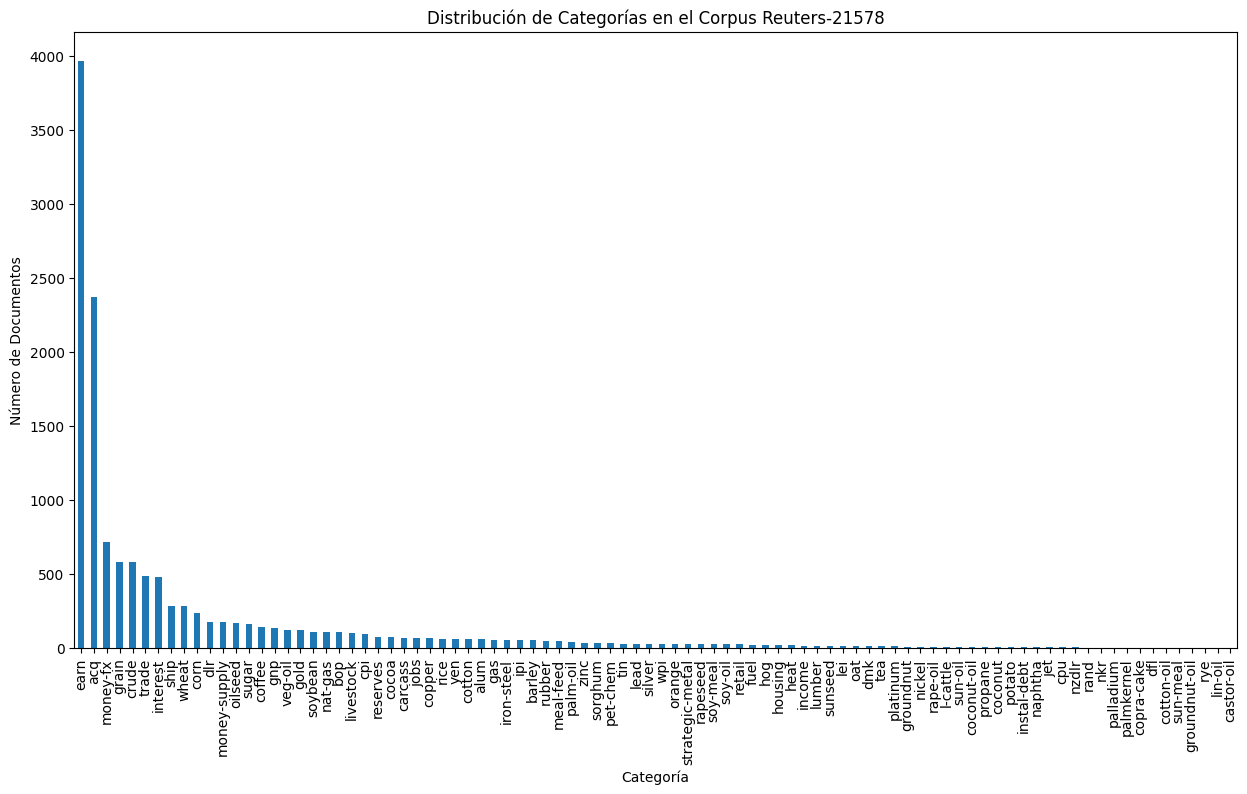

In [48]:
import matplotlib.pyplot as plt

# Contar el número de documentos por categoría
category_counts = ground_truth_df.explode('Documents').groupby('Category').size().sort_values(ascending=False)

# Mostrar las primeras 10 categorías
print(category_counts.head(10))

# Graficar la distribución de categorías
plt.figure(figsize=(15, 8))
category_counts.plot(kind='bar')
plt.title('Distribución de Categorías en el Corpus Reuters-21578')
plt.xlabel('Categoría')
plt.ylabel('Número de Documentos')
plt.show()


El código tiene como objetivo verificar si una consulta está presente en la "ground truth" y realizar búsquedas utilizando diferentes métodos de similitud. Luego, imprime los primeros resultados de cada búsqueda.

In [49]:
# Verificar si la consulta está en el ground truth
query = "earn"  # Definir la consulta

# Comprobar si la consulta está presente en el diccionario ground_truth
if query in ground_truth:
    print(f"La consulta '{query}' está en el ground truth con documentos: {ground_truth[query]}")
else:
    print(f"La consulta '{query}' NO está en el ground truth")

# Búsqueda con Similitud Coseno utilizando el vectorizador Bag of Words (BoW)
results_bow_cosine = search_cosine(query, bow_vectorizer, bow_vectors)
# Almacenar los resultados de la búsqueda en results_bow_cosine

# Búsqueda con Similitud Coseno utilizando el vectorizador TF-IDF
results_tfidf_cosine = search_cosine(query, tfidf_vectorizer, tfidf_vectors)
# Almacenar los resultados de la búsqueda en results_tfidf_cosine

# Búsqueda con Similitud de Jaccard utilizando el vectorizador Bag of Words binario
results_binary_bow_jaccard = search_jaccard(query, binary_bow_inverted_index)
# Almacenar los resultados de la búsqueda en results_binary_bow_jaccard

# Imprimir los primeros 10 resultados de la búsqueda utilizando similitud coseno con BoW
print("Resultados BoW Coseno:", results_bow_cosine[:10])

# Imprimir los primeros 10 resultados de la búsqueda utilizando similitud coseno con TF-IDF
print("Resultados TF-IDF Coseno:", results_tfidf_cosine[:10])

# Imprimir los primeros 10 resultados de la búsqueda utilizando similitud de Jaccard con BoW binario
print("Resultados BoW Binario Jaccard:", results_binary_bow_jaccard[:10])

La consulta 'earn' está en el ground truth con documentos: ['14859', '14860', '14872', '14873', '14875', '14876', '14899', '14903', '14911', '14926', '14930', '14933', '14934', '14954', '14958', '14960', '14962', '14963', '14965', '14967', '14968', '14969', '14970', '14971', '14975', '14981', '14983', '14984', '14985', '14993', '14995', '14998', '15000', '15002', '15005', '15006', '15011', '15012', '15016', '15020', '15023', '15026', '15027', '15028', '15029', '15032', '15046', '15053', '15055', '15056', '15062', '15063', '15065', '15067', '15070', '15074', '15077', '15078', '15079', '15082', '15090', '15093', '15094', '15103', '15104', '15107', '15109', '15110', '15118', '15120', '15121', '15126', '15130', '15136', '15141', '15144', '15145', '15152', '15153', '15157', '15162', '15172', '15175', '15180', '15185', '15188', '15189', '15190', '15193', '15194', '15197', '15205', '15207', '15208', '15211', '15213', '15221', '15222', '15226', '15227', '15233', '15238', '15240', '15243', '152

## 2.6. Evaluación del Sistema

**Objetivo:** *Medir la efectividad del sistema.*

### Código y Explicación

El siguiente código define las funciones para evaluar la efectividad del sistema de recuperación de información utilizando métricas como precisión, recall y F1-score. 


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score  # Importar funciones de evaluación

# Función para evaluar los resultados de búsqueda
def evaluate(query, results, ground_truth):
    """
    Evalúa los resultados de búsqueda utilizando las métricas de precisión, recall y F1-score.
    
    Parameters:
    - query: la consulta en formato de texto
    - results: lista de resultados de la búsqueda (documentos recuperados)
    - ground_truth: diccionario con la ground truth (categorías relevantes para cada consulta)
    
    Returns:
    - precision: Precisión de la búsqueda
    - recall: Recall de la búsqueda
    - f1: F1-score de la búsqueda
    """
    # Obtener las categorías relevantes para la consulta
    query_categories = ground_truth.get(query, [])
    
    # Crear las etiquetas verdaderas (1 si el documento es relevante, 0 si no lo es)
    y_true = [1 if str(doc_id) in query_categories else 0 for doc_id, _ in results]
    # Crear las etiquetas predichas (todos los documentos recuperados se consideran relevantes)
    y_pred = [1] * len(results)
    
    if not query_categories:
        print(f"No se encontraron categorías relevantes para la consulta '{query}'")
        return 0, 0, 0  # Evitar división por cero si no hay categorías relevantes

    # Agregar información de depuración
    print(f"Documentos relevantes para '{query}': {query_categories}")
    print(f"Documentos recuperados: {[doc_id for doc_id, _ in results[:10]]}")
    print(f"y_true: {y_true[:10]}")
    
    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

# Evaluar resultados para la consulta con BoW Coseno
precision, recall, f1 = evaluate(query, results_bow_cosine, ground_truth)
print(f"BoW Coseno - Precisión: {precision}, Recall: {recall}, F1: {f1}")

# Evaluar resultados para la consulta con TF-IDF Coseno
precision, recall, f1 = evaluate(query, results_tfidf_cosine, ground_truth)
print(f"TF-IDF Coseno - Precisión: {precision}, Recall: {recall}, F1: {f1}")

# Evaluar resultados para la consulta con BoW Binario Jaccard
precision, recall, f1 = evaluate(query, results_binary_bow_jaccard, ground_truth)
print(f"BoW Binario Jaccard - Precisión: {precision}, Recall: {recall}, F1: {f1}")


Documentos relevantes para 'earn': ['14859', '14860', '14872', '14873', '14875', '14876', '14899', '14903', '14911', '14926', '14930', '14933', '14934', '14954', '14958', '14960', '14962', '14963', '14965', '14967', '14968', '14969', '14970', '14971', '14975', '14981', '14983', '14984', '14985', '14993', '14995', '14998', '15000', '15002', '15005', '15006', '15011', '15012', '15016', '15020', '15023', '15026', '15027', '15028', '15029', '15032', '15046', '15053', '15055', '15056', '15062', '15063', '15065', '15067', '15070', '15074', '15077', '15078', '15079', '15082', '15090', '15093', '15094', '15103', '15104', '15107', '15109', '15110', '15118', '15120', '15121', '15126', '15130', '15136', '15141', '15144', '15145', '15152', '15153', '15157', '15162', '15172', '15175', '15180', '15185', '15188', '15189', '15190', '15193', '15194', '15197', '15205', '15207', '15208', '15211', '15213', '15221', '15222', '15226', '15227', '15233', '15238', '15240', '15243', '15247', '15250', '15258', '

Este proceso permite evaluar la efectividad del sistema de recuperación de información para todas las categorías, utilizando diferentes técnicas de búsqueda y métricas de evaluación.

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score  # Importar funciones de evaluación

# Función para evaluar los resultados de búsqueda para una categoría específica
def evaluate(query, results, ground_truth):
    """
    Evalúa los resultados de búsqueda utilizando las métricas de precisión, recall y F1-score.
    
    Parameters:
    - query: la consulta en formato de texto (categoría específica)
    - results: lista de resultados de la búsqueda (documentos recuperados)
    - ground_truth: diccionario con la ground truth (categorías relevantes para cada consulta)
    
    Returns:
    - precision: Precisión de la búsqueda
    - recall: Recall de la búsqueda
    - f1: F1-score de la búsqueda
    """
    # Obtener las categorías relevantes para la consulta
    query_categories = ground_truth.get(query, [])
    
    # Crear las etiquetas verdaderas (1 si el documento es relevante, 0 si no lo es)
    y_true = [1 if str(doc_id) in query_categories else 0 for doc_id, _ in results]
    # Crear las etiquetas predichas (todos los documentos recuperados se consideran relevantes)
    y_pred = [1] * len(results)
    
    # Si no hay categorías relevantes para la consulta, retornar métricas cero
    if not query_categories:
        print(f"No se encontraron categorías relevantes para la consulta '{query}'")
        return 0, 0, 0

    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # Imprimir métricas por categoría
    print(f"Categoría: {query} - Precisión: {precision}, Recall: {recall}, F1: {f1}")
    
    return precision, recall, f1

# Evaluación para todas las categorías
def evaluate_all_categories(ground_truth, vectorizers, doc_vectors, inverted_index):
    """
    Evalúa el sistema para todas las categorías en la ground truth.
    
    Parameters:
    - ground_truth: diccionario con la ground truth (categorías relevantes para cada consulta)
    - vectorizers: diccionario con los vectorizadores (BoW, TF-IDF)
    - doc_vectors: diccionario con los vectores de documentos (BoW, TF-IDF)
    - inverted_index: índice invertido para la búsqueda con Jaccard
    
    Returns:
    - metrics: diccionario con las métricas de evaluación por categoría
    - avg_metrics: diccionario con las métricas de evaluación promedio
    """
    metrics = {
        'bow_cosine': {'precision': [], 'recall': [], 'f1': []},
        'tfidf_cosine': {'precision': [], 'recall': [], 'f1': []},
        'binary_bow_jaccard': {'precision': [], 'recall': [], 'f1': []}
    }
    
    # Evaluar cada categoría en la ground truth
    for category in ground_truth.keys():
        query = category
        
        # Búsqueda y evaluación con BoW Coseno
        results_bow_cosine = search_cosine(query, vectorizers['bow'], doc_vectors['bow'])
        precision, recall, f1 = evaluate(query, results_bow_cosine, ground_truth)
        metrics['bow_cosine']['precision'].append((category, precision))
        metrics['bow_cosine']['recall'].append((category, recall))
        metrics['bow_cosine']['f1'].append((category, f1))
        
        # Búsqueda y evaluación con TF-IDF Coseno
        results_tfidf_cosine = search_cosine(query, vectorizers['tfidf'], doc_vectors['tfidf'])
        precision, recall, f1 = evaluate(query, results_tfidf_cosine, ground_truth)
        metrics['tfidf_cosine']['precision'].append((category, precision))
        metrics['tfidf_cosine']['recall'].append((category, recall))
        metrics['tfidf_cosine']['f1'].append((category, f1))
        
        # Búsqueda y evaluación con BoW Binario Jaccard
        results_binary_bow_jaccard = search_jaccard(query, inverted_index)
        precision, recall, f1 = evaluate(query, results_binary_bow_jaccard, ground_truth)
        metrics['binary_bow_jaccard']['precision'].append((category, precision))
        metrics['binary_bow_jaccard']['recall'].append((category, recall))
        metrics['binary_bow_jaccard']['f1'].append((category, f1))
    
    # Calcular métricas promedio para cada método de búsqueda
    avg_metrics = {
        'bow_cosine': {
            'precision': np.mean([score for _, score in metrics['bow_cosine']['precision']]),
            'recall': np.mean([score for _, score in metrics['bow_cosine']['recall']]),
            'f1': np.mean([score for _, score in metrics['bow_cosine']['f1']]),
        },
        'tfidf_cosine': {
            'precision': np.mean([score for _, score in metrics['tfidf_cosine']['precision']]),
            'recall': np.mean([score for _, score in metrics['tfidf_cosine']['recall']]),
            'f1': np.mean([score for _, score in metrics['tfidf_cosine']['f1']]),
        },
        'binary_bow_jaccard': {
            'precision': np.mean([score for _, score in metrics['binary_bow_jaccard']['precision']]),
            'recall': np.mean([score for _, score in metrics['binary_bow_jaccard']['recall']]),
            'f1': np.mean([score for _, score in metrics['binary_bow_jaccard']['f1']]),
        }
    }
    
    return metrics, avg_metrics


Este código permite evaluar y visualizar la efectividad del sistema de recuperación de información mediante la generación de gráficos que comparan diferentes métodos de búsqueda.

Categoría: trade - Precisión: 0.024336283185840708, Recall: 1.0, F1: 0.047516198704103674
Categoría: trade - Precisión: 0.03313253012048193, Recall: 1.0, F1: 0.0641399416909621
Categoría: trade - Precisión: 0.021454112038140644, Recall: 1.0, F1: 0.042007001166861145
Categoría: grain - Precisión: 0.032520325203252036, Recall: 1.0, F1: 0.06299212598425197
Categoría: grain - Precisión: 0.02727272727272727, Recall: 1.0, F1: 0.05309734513274336
Categoría: grain - Precisión: 0.02553191489361702, Recall: 1.0, F1: 0.04979253112033195
Categoría: nat-gas - Precisión: 0.009900990099009901, Recall: 1.0, F1: 0.0196078431372549
Categoría: nat-gas - Precisión: 0.0, Recall: 0.0, F1: 0.0
Categoría: nat-gas - Precisión: 0.0, Recall: 0.0, F1: 0.0
Categoría: crude - Precisión: 0.03125, Recall: 1.0, F1: 0.06060606060606061
Categoría: crude - Precisión: 0.024193548387096774, Recall: 1.0, F1: 0.047244094488188976
Categoría: crude - Precisión: 0.0379746835443038, Recall: 1.0, F1: 0.07317073170731707
Categoría

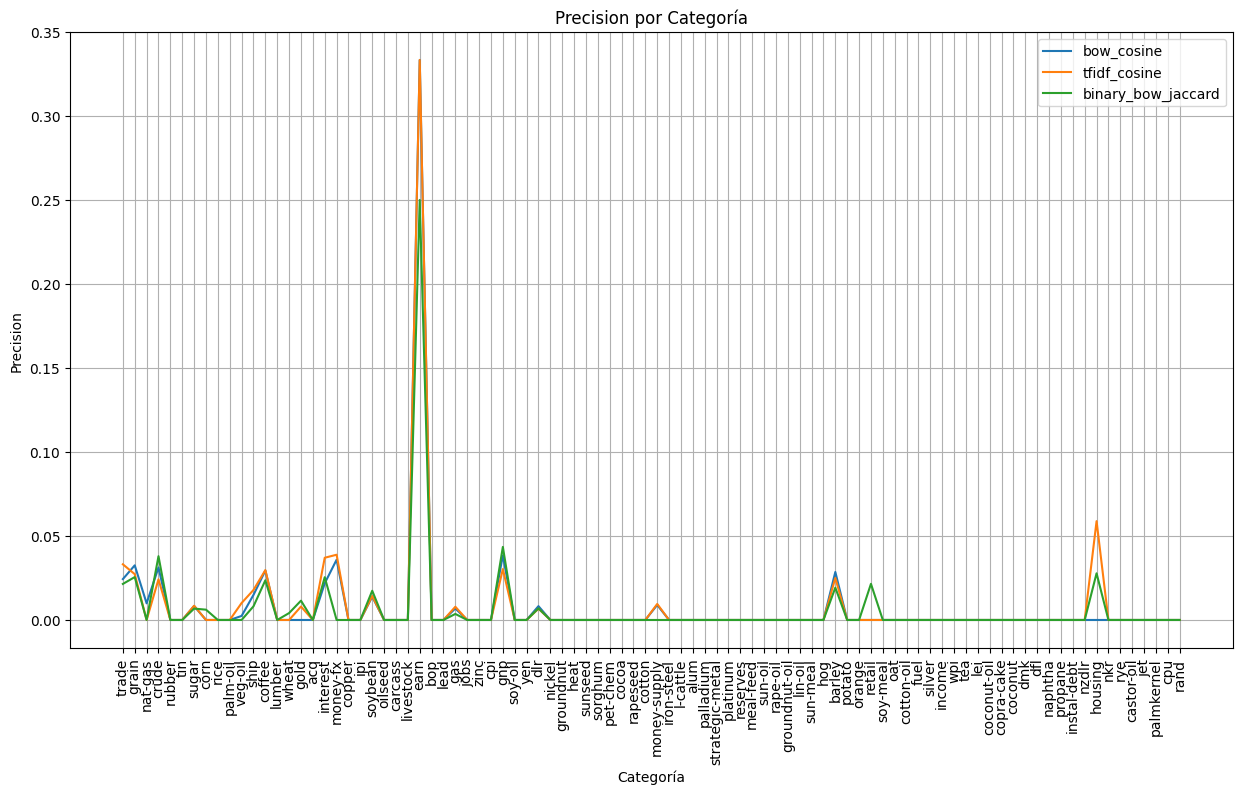

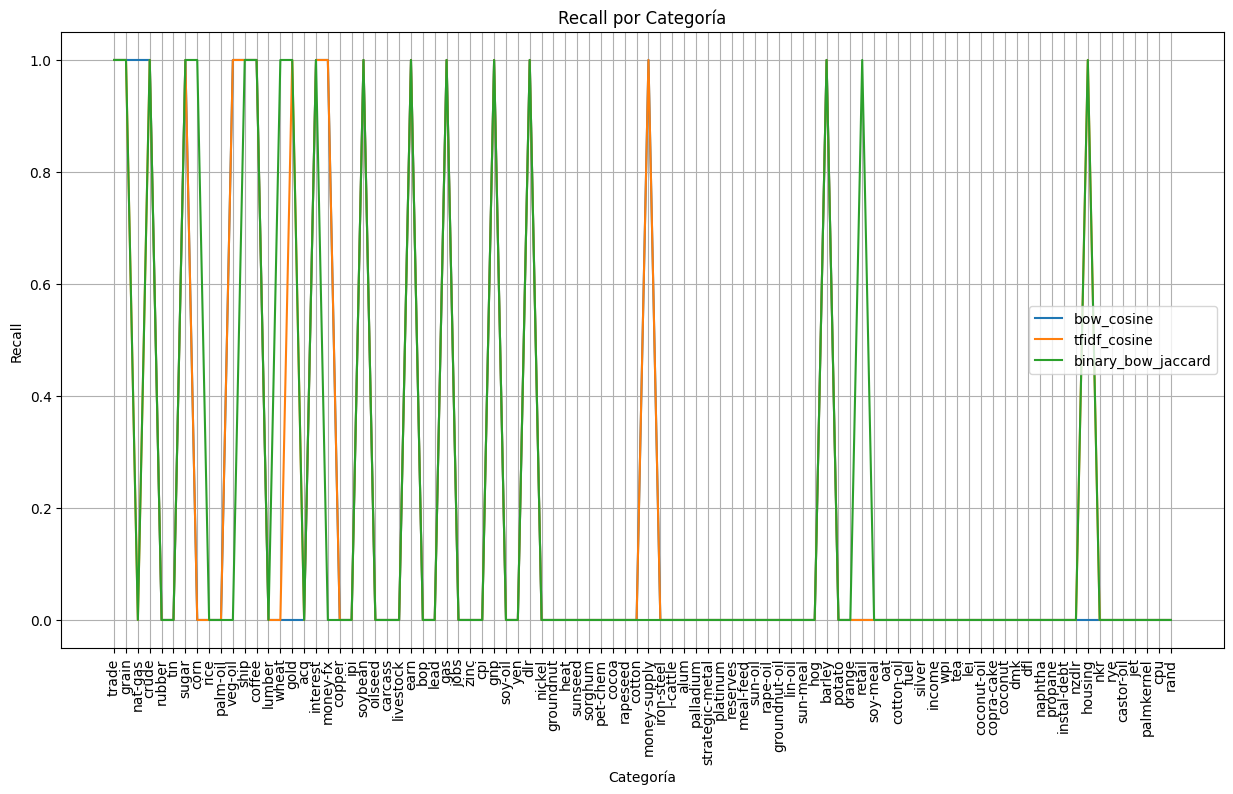

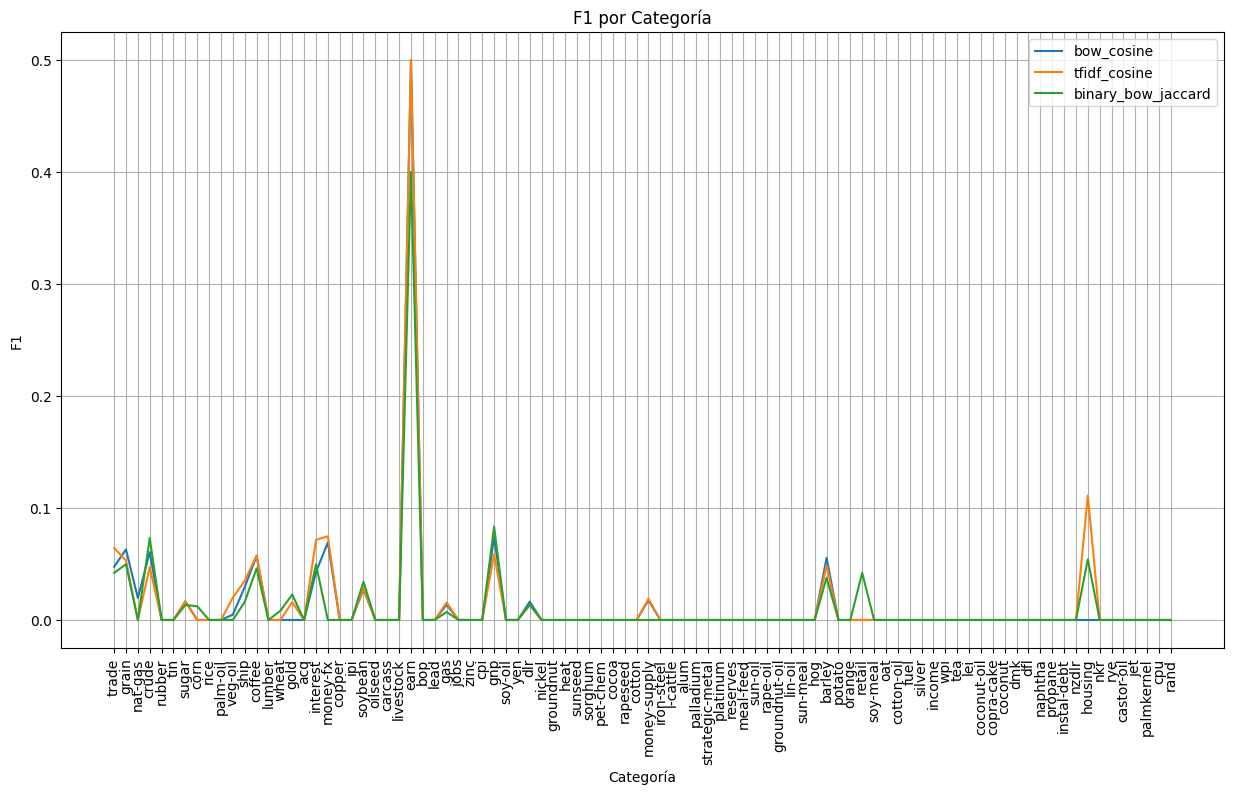

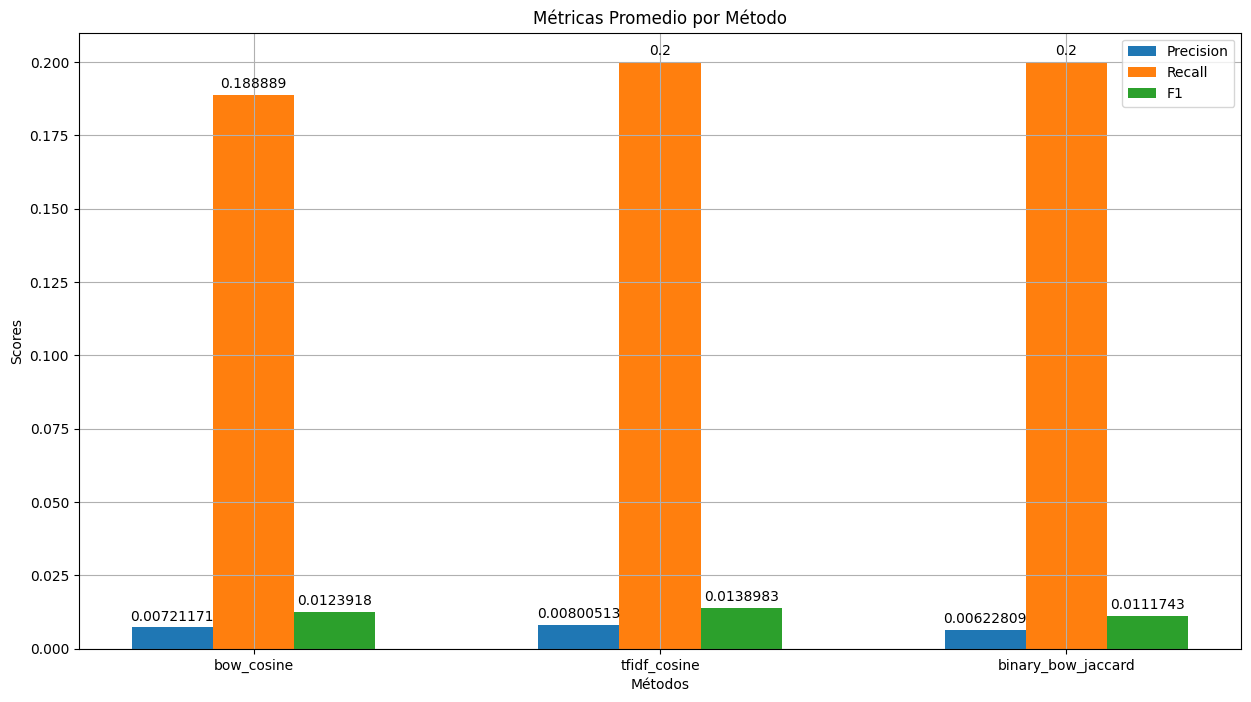

In [52]:
# Función para graficar las métricas por categoría
def plot_metrics(metrics, metric_name):
    """
    Grafica las métricas de evaluación (precisión, recall, F1-score) por categoría para diferentes métodos.
    
    Parameters:
    - metrics: diccionario con las métricas por categoría y método
    - metric_name: nombre de la métrica a graficar (precision, recall, f1)
    """
    fig, ax = plt.subplots(figsize=(15, 8))  # Crear una figura y un eje
    for method, values in metrics.items():
        categories, scores = zip(*values[metric_name])  # Obtener categorías y puntajes
        ax.plot(categories, scores, label=method)  # Graficar los puntajes por categoría
    
    ax.set_xlabel('Categoría')  # Etiqueta del eje X
    ax.set_ylabel(metric_name.capitalize())  # Etiqueta del eje Y
    ax.set_title(f'{metric_name.capitalize()} por Categoría')  # Título del gráfico
    ax.legend()  # Mostrar la leyenda
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X
    plt.grid(True)  # Mostrar la cuadrícula
    plt.show()  # Mostrar el gráfico

# Función para graficar las métricas promedio
def plot_avg_metrics(avg_metrics):
    """
    Grafica las métricas promedio (precisión, recall, F1-score) para diferentes métodos.
    
    Parameters:
    - avg_metrics: diccionario con las métricas promedio por método
    """
    categories = list(avg_metrics.keys())  # Obtener los métodos
    precision_scores = [avg_metrics[method]['precision'] for method in categories]  # Puntajes de precisión
    recall_scores = [avg_metrics[method]['recall'] for method in categories]  # Puntajes de recall
    f1_scores = [avg_metrics[method]['f1'] for method in categories]  # Puntajes de F1-score
    
    x = np.arange(len(categories))  # Etiquetas de categoría en el eje X
    width = 0.2  # Ancho de las barras

    fig, ax = plt.subplots(figsize=(15, 8))  # Crear una figura y un eje
    
    # Graficar las barras para cada métrica
    bars1 = ax.bar(x - width, precision_scores, width, label='Precision')
    bars2 = ax.bar(x, recall_scores, width, label='Recall')
    bars3 = ax.bar(x + width, f1_scores, width, label='F1')

    ax.set_xlabel('Métodos')  # Etiqueta del eje X
    ax.set_ylabel('Scores')  # Etiqueta del eje Y
    ax.set_title('Métricas Promedio por Método')  # Título del gráfico
    ax.set_xticks(x)  # Configurar las etiquetas del eje X
    ax.set_xticklabels(categories)  # Configurar los nombres de las etiquetas del eje X
    ax.legend()  # Mostrar la leyenda
    plt.grid(True)  # Mostrar la cuadrícula
    
    # Mostrar etiquetas en las barras
    ax.bar_label(bars1, padding=3)
    ax.bar_label(bars2, padding=3)
    ax.bar_label(bars3, padding=3)

    plt.show()  # Mostrar el gráfico

# Definir vectorizadores y vectores de documentos
vectorizers = {
    'bow': bow_vectorizer,
    'tfidf': tfidf_vectorizer
}

doc_vectors = {
    'bow': bow_vectors,
    'tfidf': tfidf_vectors
}

# Evaluar todas las categorías con umbral y graficar las métricas
metrics, avg_metrics = evaluate_all_categories(ground_truth, vectorizers, doc_vectors, binary_bow_inverted_index)

# Graficar precisión, recall y F1 por categoría
plot_metrics(metrics, 'precision')
plot_metrics(metrics, 'recall')
plot_metrics(metrics, 'f1')

# Graficar las métricas promedio
plot_avg_metrics(avg_metrics)
